In [ ]:
try:
    # mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive')
    %cd /content/drive/My Drive/path_to_your_project_directory
except:
    pass

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/GithubProject/chest-xray-cnn/src


In [11]:
!ls

chest-xray-notebook.ipynb  evaluate.py	__init__.py  __pycache__  utils.py
dataset.py		   gradcam.py	model.py     train.py


## Import libraries

In [ ]:
from PIL import Image
import tensorflow as tf
from train import train_model
from dataset import get_dataloaders
from evaluate import evaluate_model
from train import train_model
from dataset import get_dataloaders
from evaluate import evaluate_model

## Visualizing Sample Chest X-Ray Images by Class

In [18]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# --- function to load random images per class ---
def show_random_samples(base_path, classes, samples_per_class=4):
    plt.figure(figsize=(15, 10))
    i = 1

    for cls in classes:
        class_path = os.path.join(base_path, cls)
        images = os.listdir(class_path)
        images = [img for img in images if img.lower().endswith(("jpg", "png", "jpeg"))]

        # pick random files
        chosen = random.sample(images, samples_per_class)

        for img_name in chosen:
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path)

            plt.subplot(len(classes), samples_per_class, i)
            plt.imshow(img, cmap='gray')
            plt.title(f"{cls.capitalize()}")
            plt.axis("off")
            i += 1

    plt.suptitle("Random Samples from Each Class", fontsize=18)
    plt.tight_layout()
    plt.show()



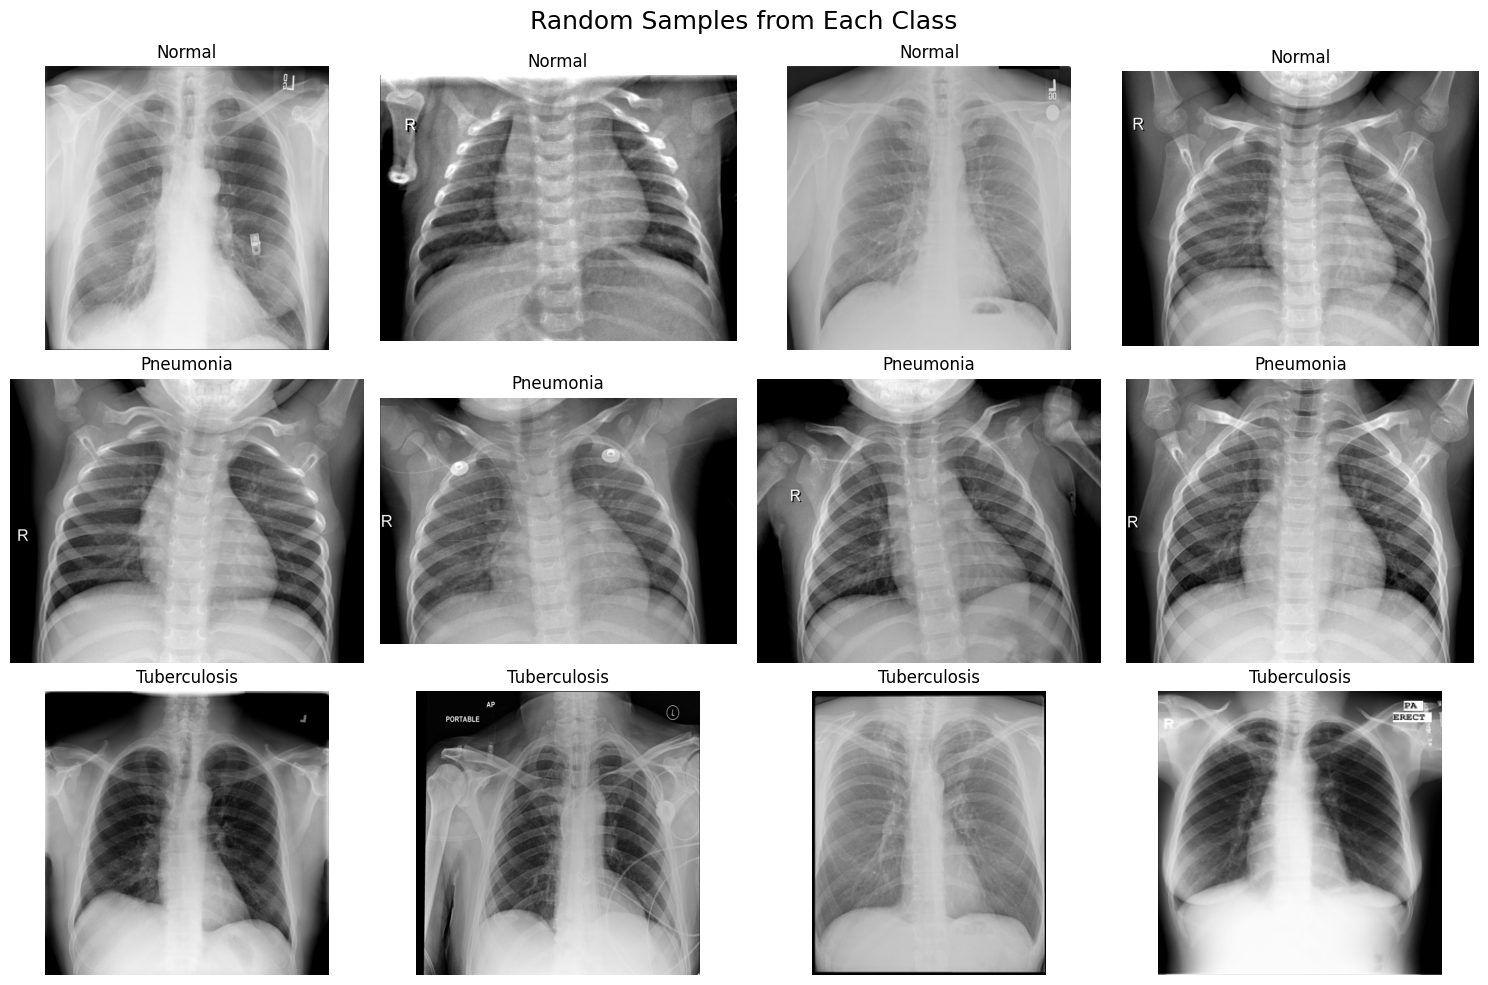

In [ ]:
# --- paths ---
path = "your_dataset_path/chest_xray/train"  # replace with your dataset path
classes = ["normal", "pneumonia", "tuberculosis"]
show_random_samples(path, classes)


## Train the model

Found 20450 files belonging to 3 classes.
Found 2534 files belonging to 3 classes.
Found 2569 files belonging to 3 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
640/640 ━━━━━━━━━━━━━━━━━━━━ 9723s 15s/step - accuracy: 0.6936 - loss: 0.7137 - val_accuracy: 0.7226 - val_loss: 0.4777
Epoch 2/15
640/640 ━━━━━━━━━━━━━━━━━━━━ 258s 403ms/step - accuracy: 0.7391 - loss: 0.4879 - val_accuracy: 0.5067 - val_loss: 1.9886
Epoch 3/15
640/640 ━━━━━━━━━━━━━━━━━━━━ 246s 385ms/step - accuracy: 0.7658 - loss: 0.4279 - val_accuracy: 0.5391 - val_loss: 2.6583
Epoch 4/15
640/640 ━━━━━━━━━━━━━━━━━━━━ 261s 408ms/step - accuracy: 0.7723 - loss: 0.4055 - val_accuracy: 0.5762 - val_loss: 3.3750
Epoch 5/15
640/640 ━━━━━━━━━━━━━━━━━━━━ 262s 407ms/step - accuracy: 0.7625 - loss: 0.3991 - val_accuracy: 0.5399 - val_loss: 1.4896
Epoch 6/15
640/640 ━━━━━━━━━━━━━━━━━━━━ 247s 384ms/step - accuracy: 0.7699 - loss: 0.3876 - val_accuracy: 0.7403 - val_loss: 0.4724
Epoch 7/15
640/640 ━━━━━━━━━━━━━━━━━━━━ 246s 385ms/step - accuracy: 0.7707 - loss: 0.3745 - val_accuracy: 0.7127 - val_loss: 0.5967
Epoch 8/15
640/640 ━━━━━━━━━━━━━━━━━━━━ 278s 410ms/step - accuracy: 0.7810 - 

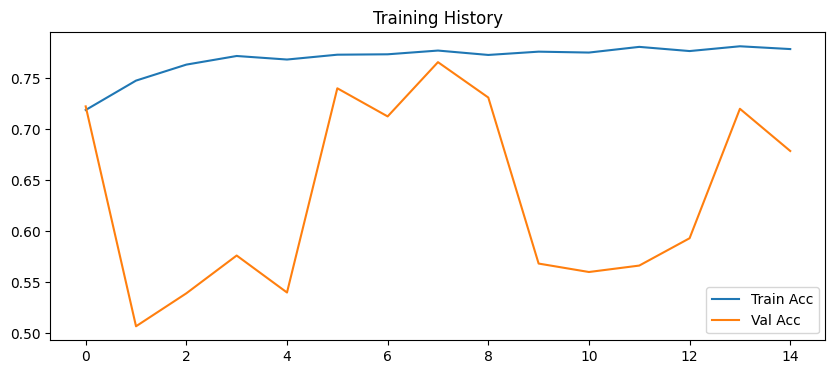

In [ ]:
model = train_model(data_dir="/path_to_your_project_directory/chest_xray/train", img_size=224, batch_size=32, epochs=15)

In [ ]:

def get_testloader(data_dir, img_size=224, batch_size=32):
    test_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        image_size=(img_size, img_size),
        batch_size=batch_size,
        shuffle=False,
        label_mode="int"
    )
    return test_ds.prefetch(tf.data.AUTOTUNE)

test_ds = get_testloader("path_to_your_project_directory/chest_xray/test")  # points directly to your class folders


Found 2569 files belonging to 3 classes.


## Evaluate model with the test set

81/81 ━━━━━━━━━━━━━━━━━━━━ 29s 348ms/step
              precision    recall  f1-score   support

      normal       0.68      0.49      0.57       925
   pneumonia       0.96      0.53      0.68       580
tuberculosis       0.60      0.90      0.72      1064

    accuracy                           0.67      2569
   macro avg       0.75      0.64      0.66      2569
weighted avg       0.71      0.67      0.66      2569



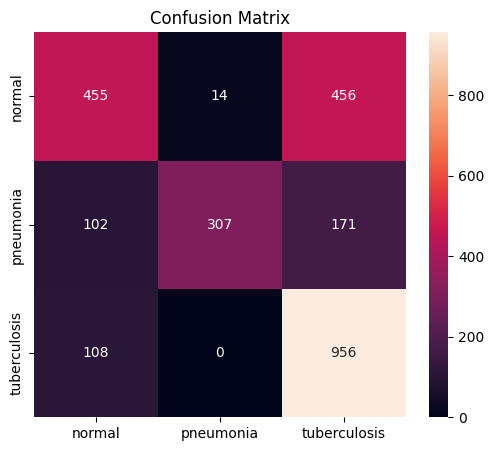

In [27]:
class_names = ["normal", "pneumonia", "tuberculosis"]
evaluate_model(model, test_ds, class_names)